Twitter Sentiment Analysis Practice Problem:

We will do so by following a sequence of steps needed to solve a general sentiment analysis problem. We will start with preprocessing and cleaning of the raw text of the tweets. Then we will explore the cleaned text and try to get some intuition about the context of the tweets. After that, we will extract numerical features from the data and finally use these feature sets to train models and identify the sentiments of the tweets.

This is one of the most interesting challenges in NLP so I’m very excited to take this journey with you!

**Table of Contents**  
  

1.   Understand the Problem Statement
2.   Tweets Preprocessing and Cleaning  
Story Generation and Visualization from Tweets  
Extracting Features from Cleaned Tweets  
Model Building: Sentiment Analysis  
What’s Next  

#Understand The Problem Statement

Understand the Problem Statement
Let’s go through the problem statement once as it is very crucial to understand the objective before working on the dataset. The problem statement is as follows:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

Note: The evaluation metric from this practice problem is F1-Score

#Tweets Preprocessing & cleaning

In [ ]:
#Call Important Libraries:

import re # for regular expressions
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
#Display multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Read the dataset
path="/gdrive/MyDrive/Practice/Twitter/"

In [ ]:
train=pd.read_csv(path+'train_E6oV3lV.csv')
test=pd.read_csv(path+'test_tweets_anuFYb8.csv')

Data Inspection

In [ ]:
train.head()
test.head()
# We see train and test dataset have three columns with id, label and tweet. Tweet with label 0 is non racist / sexist while with label 1 is racist.

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [ ]:
train[train['label']==0].head(5)
train[train['label']==1].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [ ]:
train.shape
print("")
test.shape

(31962, 3)

(17197, 2)

In [ ]:
#see distribution of racist and non racist tweets
#label 0 have almost 93% share i.e. non racist
#label1 have 7% share i.e. racist which is a challenge now
train['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

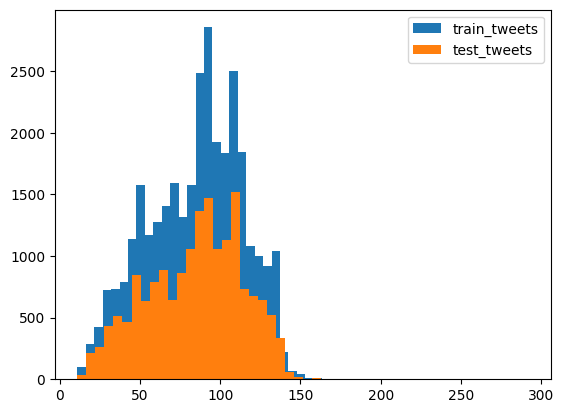

In [ ]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=50,label='train_tweets');
plt.hist(length_test,bins=50,label='test_tweets');
plt.legend();
plt.show();

##Data Cleaning:

In [ ]:
#combined the two datasets train+test to clean and then split
comb=train.append(test,ignore_index=True)
comb.shape

<ipython-input-11-333ce82310bd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb=train.append(test,ignore_index=True)


(49159, 3)

In [ ]:
# let us give a function to remove unwanted text pattern from the tweets:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)

    return input_txt

In [ ]:
#Remove twitter handle @ user as they do not add significant importance:
comb['tidy_tweet']=np.vectorize(remove_pattern)(comb['tweet'],'@[\w]*')

In [ ]:
comb.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#Remove Puntuation, numbers, characters: Regular Expression [^a-zA-Z#] means anything except numbers and #
comb['tidy_tweet']=comb['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
comb.head()

<ipython-input-15-ca8edac89f9a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  comb['tidy_tweet']=comb['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
#remove the short words upto three characters in length
comb['tidy_tweet']=comb['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3] ))
comb.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
#tokenizing the string into token of words
tokenized_tweet=comb['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet

0                                                           [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                               [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                                [bihday, your, majesty]
3                                                                                                       [#model, love, take, with, time]
4                                                                                                     [factsguide, society, #motivation]
                                                                      ...                                                               
49154                         [thought, factory, left, right, polarisation, #trump, #uselections, #leadership, #politics, #brexit, #blm]
49155                                    

In [ ]:
#text normalization to remove adverb, adjectve, tense verbs etc.
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

In [ ]:
# Now let us switch all tokens together:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

comb['tidy_tweet']=tokenized_tweet


In [ ]:
comb.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#Text Visualisation to get insights

<Figure size 1200x800 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

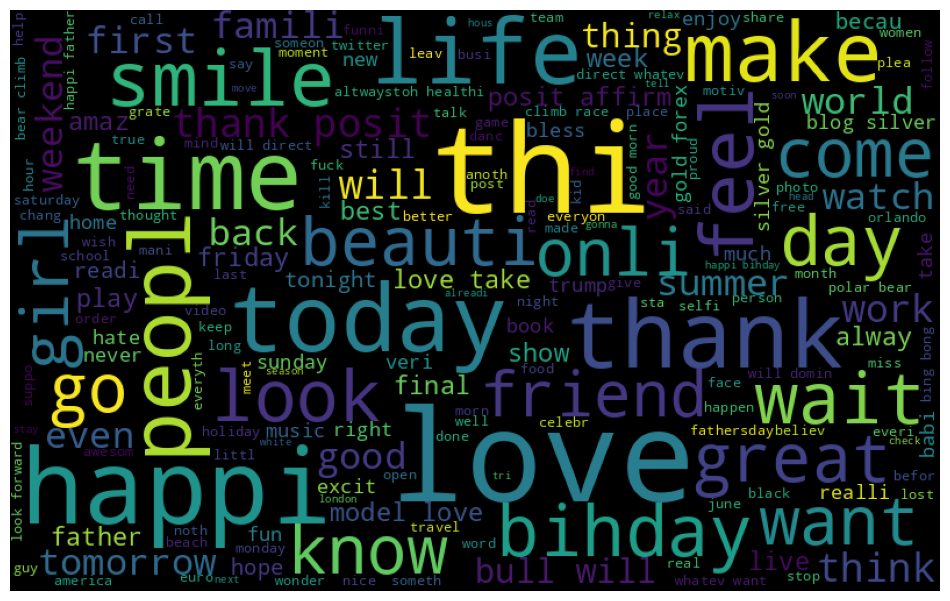

In [ ]:
#using the wordcloud to know max repeated words wrt size
all_words=' '.join([text for text in comb['tidy_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,
           #interpolation='bilinear',
           )
plt.axis('off')
plt.show()

<Figure size 1000x800 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

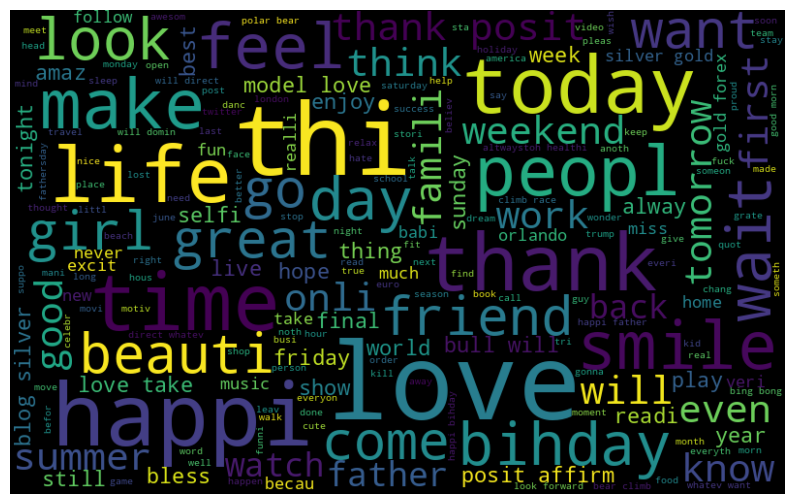

In [ ]:
#using the wordcloud to know max repeated positive words wrt size
all_words=' '.join([text for text in comb['tidy_tweet'][comb['label']==0]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 800x400 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

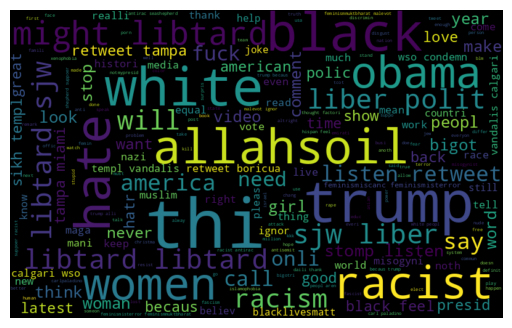

In [ ]:
#using the wordcloud to know max repeated negative words wrt size
all_words=' '.join([text for text in comb['tidy_tweet'][comb['label']==1]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Understanding hashtag phenomena to find out what is in trend
#create a function to collect hastags:
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [ ]:
#extract positive hashtags
HT_regular = hashtag_extract(comb['tidy_tweet'][comb['label'] == 0])

In [ ]:
#extract negative hashtags:
HT_negative = hashtag_extract(comb['tidy_tweet'][comb['label'] == 1])

In [ ]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

<Figure size 500x300 with 0 Axes>

[Text(0, 0.5, 'Count')]

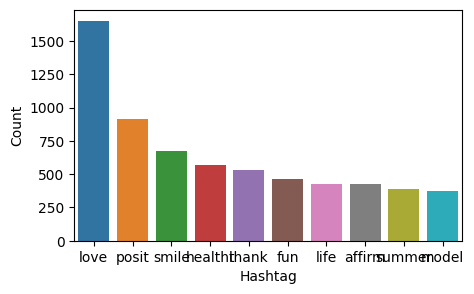

In [ ]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(5,3))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

<Figure size 1000x500 with 0 Axes>

[Text(0, 0.5, 'Count')]

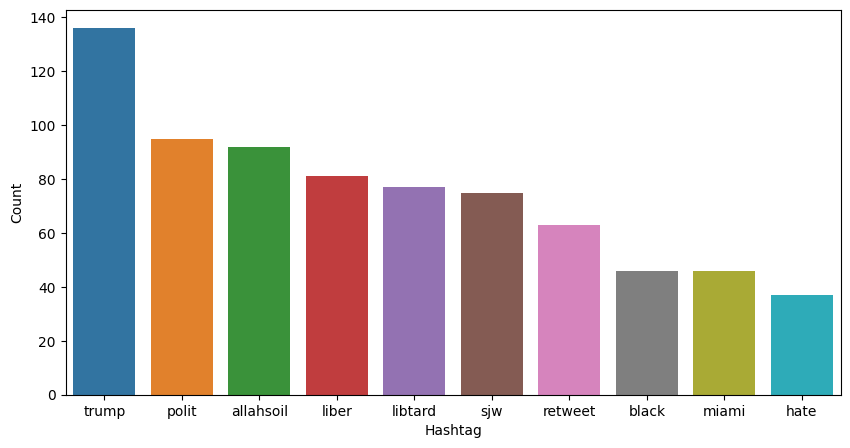

In [ ]:
#Racist/Sexist Tweets

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
comb

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happi work confer right mindset lead cultur develop organ #work #mindset


##Word Embeddings

In [ ]:
# Bag of Words features:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(comb['tidy_tweet'])

In [ ]:
# TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(comb['tidy_tweet'])

In [ ]:
tokenized_tweet

0                                             when father dysfunct selfish drag kid into dysfunct #run
1                               thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                  bihday your majesti
3                                                                           #model love take with time
4                                                                             factsguid societi #motiv
                                                     ...                                              
49154               thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155                       feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156    #hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157                         happi work confer right mindset lead cultur

In [ ]:
#wordtoVec:
#import gensim

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip uninstall pyxdameraulevenshtein
! pip install pyxdameraulevenshtein --no-binary pyxdameraulevenshtein

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyxdameraulevenshtein: filename=pyxDamerauLevenshtein-1.7.1-cp39-cp39-linux_x86_64.whl size=85210 sha256=b42112fac386ec8bb3f01a15d52c3e5cffc856dd9449defeffb988e520ed5bbb
  Stored in directory: /root/.cache/pip/wheels/2b/b0/25/ec532a19eaae39a15d21149588d8589cf72565a19d6df1e002
Successfully built pyxdameraulevenshtein


In [ ]:
! pip install numpy==1.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.


In [ ]:
import gensim
from gensim.models.keyedvectors import KeyedVectors
import os
gensim.__version__   # 4.1.0

'4.3.1'

In [ ]:
tokenized_tweet = comb['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [ ]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

In [ ]:
model_w2v.train(tokenized_tweet, total_examples= len(comb['tidy_tweet']), epochs=20)

(6510607, 7536020)

In [ ]:
model_w2v=model_w2v.wv

In [ ]:
model_w2v.most_similar(positive="trump")

[('donald', 0.5698652863502502),
 ('phoni', 0.5387369990348816),
 ('#delegaterevolt', 0.5342454314231873),
 ('potu', 0.5306435227394104),
 ('unstabl', 0.5297390818595886),
 ('unfit', 0.52581787109375),
 ('melo', 0.5158844590187073),
 ('unfavor', 0.5147409439086914),
 ('businessman', 0.5143991112709045),
 ('jibe', 0.5096775889396667)]

In [ ]:
model_w2v['food']

array([ 6.91164434e-02, -3.56225789e-01,  4.35831696e-01, -6.64568365e-01,
       -4.82138880e-02,  7.47527368e-03,  8.77611041e-02, -1.09443367e+00,
       -2.57823318e-01, -1.27781606e+00, -9.23791677e-02,  2.72236705e-01,
       -1.39676079e-01,  2.91285574e-01, -5.41800916e-01,  1.43333048e-01,
        1.00845642e-01,  1.40454903e-01, -3.79975796e-01, -2.40939677e-01,
       -4.68477786e-01,  8.17173183e-01, -1.49743855e-01,  1.08538747e+00,
       -4.96089518e-01, -2.47347370e-01, -3.57431769e-01, -1.30656928e-01,
        1.99899763e-01, -5.10206120e-03,  3.64801973e-01, -5.51963687e-01,
        6.35615230e-01, -6.78322092e-02, -6.24950007e-02,  3.32808979e-02,
        3.62829834e-01, -7.93115199e-02,  6.70624137e-01, -3.57930660e-01,
       -4.60432023e-01,  5.85138977e-01, -3.49620581e-01,  8.31603825e-01,
       -2.15965495e-01, -1.69606701e-01, -1.11777648e-01,  7.50444829e-01,
       -1.11965263e+00,  4.99867536e-02, -2.25958556e-01, -5.46817720e-01,
        4.66055274e-01,  

In [ ]:
len(model_w2v['food'])

200

In [ ]:
#Prepare vectors for tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape   

(49159, 200)

In [ ]:
wordvec_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.071889,-0.398329,0.320916,0.059891,-0.257833,0.003993,-0.132343,-0.210871,0.193042,-0.080270,...,0.051422,-0.040376,-0.170626,0.024034,0.433464,-0.154750,-0.031109,0.048370,0.093925,0.081005
1,0.099468,-0.165272,0.172130,0.072038,-0.249953,0.122054,-0.195479,-0.069394,0.125957,0.009467,...,0.048591,-0.098987,-0.052867,-0.076798,-0.068971,-0.013537,-0.042136,-0.306900,0.153164,0.061134
2,-0.180277,-0.556771,0.103126,-0.428889,-0.043301,0.238798,-0.079639,-0.018263,0.262712,-0.432666,...,0.286144,-0.192222,-0.206634,-0.000705,0.342098,0.535301,0.068070,0.028022,-0.106311,0.285621


In [ ]:
# Doc2Vec Embedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
#from gensim.models.deprecated.doc2vec import LabeledSentence
#use
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 2572812.80it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(comb['tidy_tweet']), epochs=15)

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(comb)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [ ]:
docvec_arrays

array([[-0.05889201,  0.05395348, -0.40979528, ..., -0.30607957,
         0.03511319, -0.30572668],
       [ 0.23335561,  0.17653035, -0.13211398, ...,  0.04820729,
         0.02188317,  0.02132589],
       [ 0.05042086,  0.08336398,  0.05723352, ...,  0.00589215,
        -0.12589243, -0.05811033],
       ...,
       [ 0.02715399, -0.47772837,  0.84449643, ...,  0.07926308,
        -0.06652813, -0.38011652],
       [ 0.03493865,  0.06933212, -0.02200593, ..., -0.06326198,
        -0.16864596,  0.01679058],
       [ 0.05356427, -0.04903991, -0.11572829, ..., -0.06388864,
        -0.12625539,  0.12409872]])

In [ ]:
docvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.058892,0.053953,-0.409795,0.003152,-0.046138,-0.058028,0.157057,0.049041,-0.009403,0.359013,...,0.170864,-0.147634,-0.218562,-0.256769,0.188758,0.047276,-0.037381,-0.306080,0.035113,-0.305727
1,0.233356,0.176530,-0.132114,-0.092297,-0.146494,0.038452,0.298892,-0.160423,-0.326875,0.121183,...,0.343086,-0.307739,-0.071460,-0.121506,-0.178023,0.141678,-0.114934,0.048207,0.021883,0.021326
2,0.050421,0.083364,0.057234,0.022577,-0.072725,0.046229,0.105894,-0.166265,0.063371,-0.101803,...,0.127741,-0.095292,0.057162,-0.151997,-0.085360,0.105922,-0.197864,0.005892,-0.125892,-0.058110
3,0.047449,-0.017387,-0.039766,0.038492,-0.019245,-0.048103,0.076298,-0.195335,-0.071625,-0.047071,...,0.060803,-0.136416,0.049179,-0.139708,-0.138083,0.087592,-0.183605,0.066547,-0.164927,-0.021345
4,0.059595,0.025233,0.086306,0.163813,-0.106527,-0.131727,0.085155,-0.127253,-0.143887,-0.169697,...,0.085749,-0.099778,0.081146,-0.155223,-0.061662,0.164054,-0.217669,0.016667,-0.213328,0.015096


In [ ]:
len(comb)

49159

##Data Modelling

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

Logistic Regression  
Support Vector Machine  
RandomForest  
XGBoost

## Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [ ]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [ ]:
bow.shape

(49159, 1000)

In [ ]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

#split train_bow into train and valid dataset

xtrain_bow, xvalid_bow,ytrain,yvalid=train_test_split(train_bow,
                                                      train['label'],
                                                      random_state=42,
                                                      test_size=0.3)

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)


LogisticRegression()

In [ ]:
#prediction = lr.predict(xvalid_bow)
#prediction_int = prediction[:, 1] >= 0.3
#prediction_int = prediction_int.astype(np.int)

IndexError: ignored

In [ ]:
#prediction_int = prediction[:, 1] >= 0.3
#prediction_int = prediction_int.astype(np.int)

In [ ]:
f1_score(yvalid,prediction)
print('\n-')
#f1_score(yvalid,prediction_int)

0.48262164846077454


-


In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(xtrain_bow, ytrain) # training the model

prediction = lreg1.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.2 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

LogisticRegression()

0.5407725321888412

In [ ]:
#prediction on test dataset
test_pred = lr.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
submission.tail(10)

,id,label
17187,49150,0
17188,49151,1
17189,49152,0
17190,49153,0
17191,49154,0
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
17196,49159,0


In [ ]:
test.tail(10)

,id,tweet,label
17187,49150,loving lifeðºð¸âï¸ð #createyourfuture #lifestyle #holiday #la @ hyatt regency long beach,0
17188,49151,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking",1
17189,49152,learn how to think positive. #positive #instagram #instagood,0
17190,49153,"we love the pretty, happy and fresh you! #teenilicious #fixdermateen #generationz #pretty #fresh",0
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web-1997-ukhx_int . #web hardcore #1gabba #vk,0
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,1
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0
17196,49159,"my song ""so glad"" free download! #shoegaze #newmusic #newsong",0


In [ ]:
submission.shape

(17197, 2)

In [ ]:
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [ ]:
ytrain.shape

(22373,)

In [ ]:
#tf-idf conversions:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [ ]:
xtrain_tfidf, xvalid_tfidf,ytrain,yvalid=train_test_split(train_tfidf,
                                                      train['label'],
                                                      random_state=42,
                                                      test_size=0.3)

In [ ]:
lreg=LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

LogisticRegression()

0.5451327433628319

In [ ]:
#word2vec featuress:
train_w2v = wordvec_df.iloc[:35000,:]
test_w2v = wordvec_df.iloc[35000:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

LogisticRegression()

0.6159527326440178

In [ ]:
#Doc2Vec Features
train_d2v = docvec_df.iloc[:32000,:]
test_d2v = docvec_df.iloc[32000:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

LogisticRegression()

0.3604852686308492

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

SVC(C=1, kernel='linear', probability=True)

0.5096952908587258

In [ ]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

In [ ]:
#tf idf features
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

SVC(C=1, kernel='linear', probability=True)

0.5100182149362478

In [ ]:
#word2vec features:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

SVC(C=1, kernel='linear', probability=True)

0.6057319907048798

In [ ]:
#Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

SVC(C=1, kernel='linear', probability=True)

0.15214723926380366

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# bag of words features
rf = RandomForestClassifier(n_estimators=400, random_state=11,oob_score=True)
rf.fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=11)

0.5529225908372828

In [ ]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [ ]:
#tf idf
rf = RandomForestClassifier(n_estimators=400, random_state=11,oob_score=True)
rf.fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=11)

0.562152133580705

In [ ]:
#word2vec
rf = RandomForestClassifier(n_estimators=400, random_state=11,oob_score=True)
rf.fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=11)

0.5207226354941552

In [ ]:
#doc2vector
rf = RandomForestClassifier(n_estimators=400, random_state=11,oob_score=True)
rf.fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=11)

0.07584269662921349

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#BOW Features
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.5247706422018349

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [ ]:
#TFIDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.5394265232974911

In [ ]:
#w2v features
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb.fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=3, num_parallel_tree=None,
              predictor=None, ...)

0.6517457475380484

In [ ]:
#d2v Features
xgb = XGBClassifier(max_depth=6, 
                    n_estimators=1000, 
                    #nthread= 3,
                    )
xgb.fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.33745781777277833